In [4]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Mnist dataset with 28x28 grayscale images

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = list(map(int, y))


# X=pd.DataFrame(X).sample(n=14000, random_state=1)
# y=pd.DataFrame(y).sample(n=14000, random_state=1)

## KNeighborsClassifier

In [5]:
pcas = [15,25,35,45,55,65,75]
ks = [2,3,4,5,6,7,8]
data=[]

for i in pcas:
    for a in ks:
        MnistModelKNN = Pipeline(steps=[('pca',PCA(n_components=i)), ('knn',KNeighborsClassifier(n_neighbors=a))]).fit(X, y)
        crossval = cross_val_score(MnistModelKNN, X,y)
        data.append([i,a,crossval.mean()])
df = pd.DataFrame(data, columns=['pca','k','cv'])
df

,pca,k,cv
0,15,2,0.949900
1,15,3,0.958186
2,15,4,0.958486
3,15,5,0.958343
4,15,6,0.958286
5,15,7,0.958000
6,15,8,0.958014
7,25,2,0.967386
8,25,3,0.972957
9,25,4,0.972786


<Figure size 720x720 with 0 Axes>

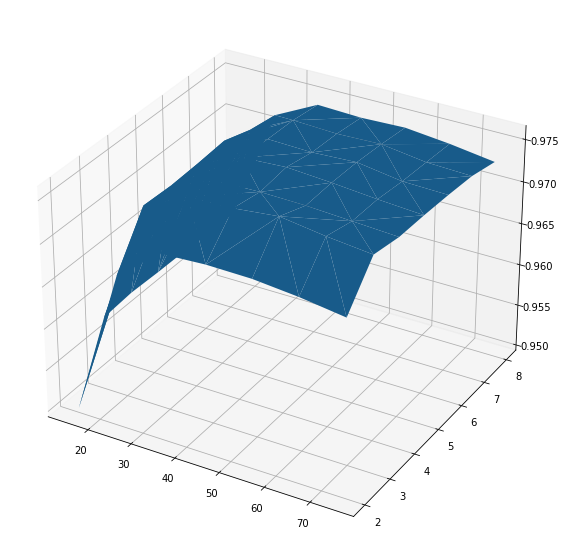

In [6]:
plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['pca'],df['k'],df['cv'])

In [7]:
df.sort_values(by=['cv'])

,pca,k,cv
0,15,2,0.949900
5,15,7,0.958000
6,15,8,0.958014
1,15,3,0.958186
4,15,6,0.958286
3,15,5,0.958343
2,15,4,0.958486
7,25,2,0.967386
42,75,2,0.970400
35,65,2,0.971143
